# Integración numérica mediante puntos de Gauss

Análisis de Estructuras. Grado en Ingeniería Civil.

Autores:

- Alejandro E. Martínez-Castro, Esther Puertas García, Rafael Gallego.
- Departamento de Mecánica de Estructuras e Ingeniería Hidráulica. Universidad de Granada.

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Cuadernos MEF: Cuadraturas de Gauss-Legendre</span> by <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Alejandro Martínez Castro, Esther Puertas García, Rafael Gallego Sevilla</span> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Reconocimiento-NoComercial-CompartirIgual 4.0 Internacional License</a>.



## Cuadraturas de Gauss-Legendre en 1 dimensión

En este cuaderno se plantea la integración numérica mediante cuadraturas de [Gauss-Legendre](https://es.wikipedia.org/wiki/Cuadratura_de_Gauss). 

En una dimensión, una cuadratura de Gauss-Legendre permite realizar la integral mediante un sumatorio

\begin{equation}
\int_{-1}^{1} f(t)\,dt = \sum_{n=1}^{N} f(t_i)\,W_i
\end{equation}

Siendo $t_i$ las abscisas de los puntos de Gauss y $W_i$ los "pesos" correspondientes a cada punto. 

La integral anterior es exacta si $f(t)$ es un polinomio, si se elige de forma adecuada el número de puntos de la cuadratura.

Si el intervalo de integración es diferente a $[-1,1]$, se acude a un cambio de variable. 

Si el intervalo en $x$ es $[x_1,x_2]$, el cambio es: 

\begin{equation}
x = x_1 + \dfrac{x_2-x_1}{2}\,(t + 1)
\end{equation}

La integral se transforma como sigue, teniendo en cuenta que: 

\begin{equation}
d x = \dfrac{x_2 - x_1}{2} \,d t
\end{equation}

\begin{equation}
\int_{x_1}^{x_2} f(x)\, \mathrm{d} x = \int_{-1}^{1} f(t) \,\dfrac{d x}{dt}\,dt = \int_{-1}^{1} f(t) \,\dfrac{x_2 - x_1}{2} \,dt  
\end{equation}


Y que esta integral se puede evaluar de forma aproximada como: 

\begin{equation}
\sum_{i=1}^{N} f(t_i)\,W_i \,\dfrac{x_2-x_1}{2}
\end{equation}

Siendo $t_i$ y $W_i$ las abscisas y los pesos de una cuadratura de Gauss de $N$ puntos.

Una propiedad importante de esta integración es que la fórmula es exacta para un polinomio de grado $2N-1$. 

Si se indexa desde el 0, estas expresiones pueden evaluarse como: 

\begin{equation}
\sum_{i=0}^{N-1} f(t_i)\,W_i \,\dfrac{x_2-x_1}{2}
\end{equation}

Esta expresión es exacta para un polinomio de grado $2\,N-1$. 

Así, 

- Para $N=1$ la integral es exacta para un polinomio de grado 1. 
- Para $N=2$ la integral es exacta para un polinomio de grado 3. 
- Para $N=3$ la integral es exacta para un polinomio de grado 5. 

In [1]:
from __future__ import division
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


En Python los puntos y pesos de una cuadratura de Gauss se obtienen mediante una función de numpy. 

In [2]:
NPGauss = 2
pgauss = np.polynomial.legendre.leggauss(NPGauss)
        
pgauss

(array([-0.57735027,  0.57735027]), array([ 1.,  1.]))

Observe que se obtiene un objeto de tipo "tupla". 
- En la posición [0] se incluye un vector de numpy, con las abscisas $t_i$.
- En la posición [1], un vector de numpy con los pesos $W_i$.

In [3]:
print type(pgauss)  # <- Le preguntamos a Python sobre "pgauss". ¿De qué tipo es?
print ""
print pgauss[0]
print type(pgauss[0])
print""
print pgauss[1]
print type(pgauss[1])

<type 'tuple'>

[-0.57735027  0.57735027]
<type 'numpy.ndarray'>

[ 1.  1.]
<type 'numpy.ndarray'>


A continuación se van a emplear estos puntos para el cálculo de diversas integrales

## Integral de un polinomio cúbico

Consideremos el polinomio: 

\begin{equation}
f(x) = a + b\,x + c\,x^2 + d\,x^3
\end{equation}

Supongamos que deseamos evaluar la integral 

\begin{equation}
\int_{x_1}^{x_2} f(x) \,dx
\end{equation}

Planteemos esta integral simbólica exacta con SymPy

In [4]:
from sympy import init_session
init_session()

IPython console for SymPy 1.0 (Python 2.7.12-32-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


### Integración analítica. 

Para integrar de forma exacta un polinomio de grado 3, hace falta una cuadratura de Gauss de orden 2. 

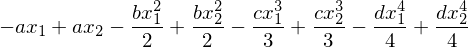

In [5]:
a,b,c,d,x1,x2 = symbols('a b c d x1 x2')
f = a + b*x + c*x**2 + d*x**3
Int_analitica = integrate(f,(x,x1,x2))
Int_analitica

Consideremos un conjunto de valores

In [6]:
a1 = 1.1
b1 = 2.5
c1 = 3.2
d1 = 4.3
xx1 = 0
xx2 = 5
Int_exacta = Int_analitica.subs([(a,a1),(b,b1),(c,c1),(d,d1),(x1,xx1),(x2,xx2)])
Int_exacta

### Integración numérica con 2 puntos de Gauss. 

Determinacion de las abscisas en x. 

In [7]:
xi = xx1 + (xx2 - xx1) / 2 * (pgauss[0] + 1)
xi

array([ 1.05662433,  3.94337567])

In [8]:
Int_numerica = 0

def pol3(x):
    return a1 + b1*x + c1*x**2 + d1*x**3

for i in range(NPGauss):
    Int_numerica += pol3(xi[i]) * (xx2-xx1)/2 * pgauss[1][i]    

Int_numerica

Comparación de resultados

In [9]:
Int_exacta,Int_numerica

Pruebe variar los valores de
        a1, b1, c1, d1, xx1, xx2
        
Observe que el resultado siempre se obtiene de forma correcta. 

### Integración reducida con 1 punto de Gauss


In [10]:
NPGauss = 1
pgauss = np.polynomial.legendre.leggauss(NPGauss)
pgauss

(array([ 0.]), array([ 2.]))

In [11]:
xi = xx1 + (xx2 - xx1) / 2 * (pgauss[0] + 1)
xi

Int_reducida = 0

for i in range(NPGauss):
    Int_reducida += pol3(xi[i]) * (xx2-xx1)/2 * pgauss[1][i]    

Int_reducida

Comparando los valores, se observar que la integración reducida produce un resultado inferior al que debería obtenerse

In [12]:
Int_exacta,Int_numerica,Int_reducida

## Integración de un polinomio de grado 5

La integración exacta requiere 3 puntos de Gauss



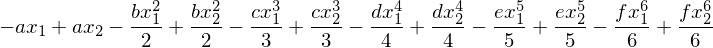

In [13]:
e,f = symbols('e,f')
g = a + b*x + c*x**2 + d*x**3 + e*x**4 + f*x**5

Int_analitica = integrate(g,(x,x1,x2))
Int_analitica

In [14]:
a1 = 3.2
b1 = 4.2
c1 = 3.2
d1 = 4.3
e1 = -2
f1 = -6

xx1 = 1
xx2 = 5
Int_exacta = Int_analitica.subs([(a,a1),(b,b1),(c,c1),(d,d1),(e,e1),(f,f1),(x1,xx1),(x2,xx2)])
Int_exacta

### Integración numérica con 3 puntos de Gauss

In [15]:
NPGauss = 3
pgauss = np.polynomial.legendre.leggauss(NPGauss)
pgauss

(array([-0.77459667,  0.        ,  0.77459667]),
 array([ 0.55555556,  0.88888889,  0.55555556]))

In [16]:
xi = xx1 + (xx2 - xx1) / 2 * (pgauss[0] + 1)
xi

array([ 1.45080666,  3.        ,  4.54919334])

In [17]:
def pol5(x):
    return a1 + b1*x + c1*x**2 + d1*x**3 + e1*x**4 + f1*x**5

Int_numerica = 0

for i in range(NPGauss):
    Int_numerica += pol5(xi[i]) * (xx2-xx1)/2 * pgauss[1][i]    

Int_numerica

In [18]:
Int_exacta,Int_numerica

### Integración  reducida con 2 puntos de Gauss

In [19]:
NPGauss = 2
pgauss = np.polynomial.legendre.leggauss(NPGauss)
pgauss

(array([-0.57735027,  0.57735027]), array([ 1.,  1.]))

In [20]:
xi = xx1 + (xx2 - xx1) / 2 * (pgauss[0] + 1)

Int_reducida = 0

for i in range(NPGauss):
    Int_reducida += pol5(xi[i]) * (xx2-xx1)/2 * pgauss[1][i]    

Int_reducida

In [21]:
Int_exacta,Int_numerica,Int_reducida

### Integración con un exceso de puntos de Gauss

Es interesante observar que si se toma una cuadratura con más puntos de Gauss de los estrictamente necesarios, el resultado es idéntico, pero con un mayor coste computacional. 

In [22]:
NPGauss = 4
pgauss = np.polynomial.legendre.leggauss(NPGauss)
pgauss

(array([-0.86113631, -0.33998104,  0.33998104,  0.86113631]),
 array([ 0.34785485,  0.65214515,  0.65214515,  0.34785485]))

In [23]:
xi = xx1 + (xx2 - xx1) / 2 * (pgauss[0] + 1)

Int_num_4pga = 0

for i in range(NPGauss):
    Int_num_4pga += pol5(xi[i]) * (xx2-xx1)/2 * pgauss[1][i]    

Int_num_4pga

In [24]:
Int_exacta,Int_numerica,Int_reducida,Int_num_4pga